In [19]:
import pandas as pd  #for datamanipulation
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA model for dimensionality reduction and classification
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn import datasets  # To load the Iris dataset
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()  # Built-in dataset containing information about iris flower species



In [4]:
# Create a DataFrame using the feature data and feature names
# The dataset has 4 features: sepal length, sepal width, petal length, and petal width
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [5]:
# Add the target column (species names) to the DataFrame
# The target column is mapped to species names: Setosa, Versicolour, and Virginica
df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Define features (X) and target (y)
# Features (X): All columns except 'species', as these represent the input attributes
X = df.drop("species", axis=1)

In [8]:
# Target (y): The 'species' column, which we want to predict
y = df["species"]


In [9]:
# Split the data into training and testing sets
# Training set: 70% of the data, Testing set: 30% of the data
# random_state makes sure the split is the same every time you run the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Initialize the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

In [11]:
# Train the LDA model using the training data
# The model learns to find a linear combination of features that separates the classes
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# Make predictions on the test set using the trained LDA model
y_pred = lda.predict(X_test)


In [13]:
# Evaluate the model's performance
# accuracy_score: Calculates the percentage of correctly classified samples
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [14]:
# classification_report: Provides precision, recall, and F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
# Define a new observation to classify
# This is a sample input with measurements of an iris flower
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

In [16]:
# Predict the class (species) of the new observation using the trained model
predicted_class = lda.predict(new_sample)
print(f"Predicted class for the new sample: {predicted_class[0]}")

Predicted class for the new sample: setosa


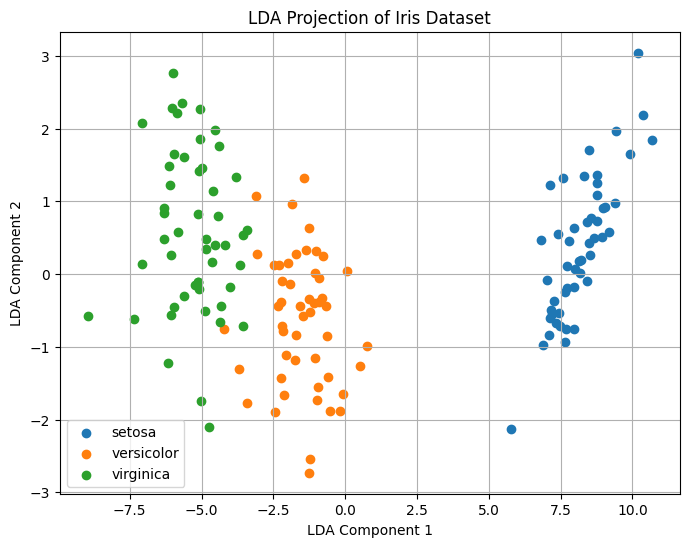

In [20]:
# Visualizing LDA components (optional)
X_lda = lda.transform(X)
plt.figure(figsize=(8, 6))
for species in y.unique():
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=species)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Iris Dataset")
plt.legend()
plt.grid()
plt.show()